<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boilerplate" data-toc-modified-id="Boilerplate-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boilerplate</a></span></li><li><span><a href="#stats-packages" data-toc-modified-id="stats-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>stats packages</a></span><ul class="toc-item"><li><span><a href="#Autoregression" data-toc-modified-id="Autoregression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Autoregression</a></span><ul class="toc-item"><li><span><a href="#from-linear-regression" data-toc-modified-id="from-linear-regression-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>from linear regression</a></span></li><li><span><a href="#creating-the-X" data-toc-modified-id="creating-the-X-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>creating the X</a></span></li><li><span><a href="#split" data-toc-modified-id="split-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>split</a></span></li><li><span><a href="#train" data-toc-modified-id="train-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>train</a></span></li><li><span><a href="#summary" data-toc-modified-id="summary-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>summary</a></span></li></ul></li><li><span><a href="#From-Scratch" data-toc-modified-id="From-Scratch-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>From Scratch</a></span></li><li><span><a href="#Test-stationary" data-toc-modified-id="Test-stationary-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Test stationary</a></span><ul class="toc-item"><li><span><a href="#Determining-the-AR-order" data-toc-modified-id="Determining-the-AR-order-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Determining the AR order</a></span></li><li><span><a href="#linear-regression-steps" data-toc-modified-id="linear-regression-steps-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>linear regression steps</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li></ul></div>

# Boilerplate

In [7]:
import pandas as pd 
import pandasql as ps
import matplotlib.pyplot as plt 
import matplotlib as mpl
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms
from plotnine import *
import plotnine as pn
import math

from IPython.display import display
from IPython.display import Markdown as md
def out(state:str = "all"):
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = state

def f():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
def nf():
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', 4, 'display.max_columns', None):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
fg()

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# stats packages

In [107]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split 
import statsmodels.api as sm

## Autoregression

In [3]:
passengers = pd.read_csv('data/AirPassengers.csv', index_col='Month', parse_dates=True)
passengers = passengers['#Passengers']
series = passengers

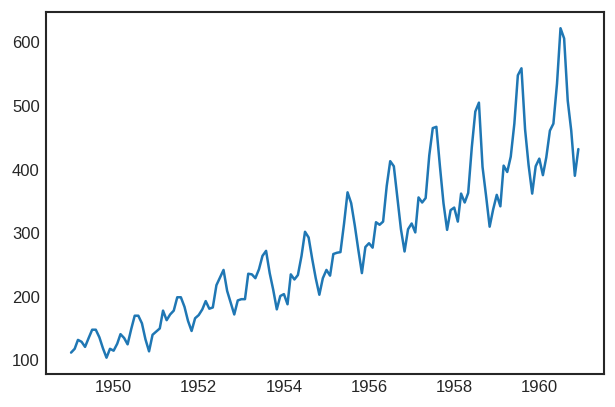

In [4]:
plt.plot(series)

In [5]:
from statsmodels.tsa.ar_model import AutoReg

In [115]:
pacfobj = pacf(series)
pacfobj

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

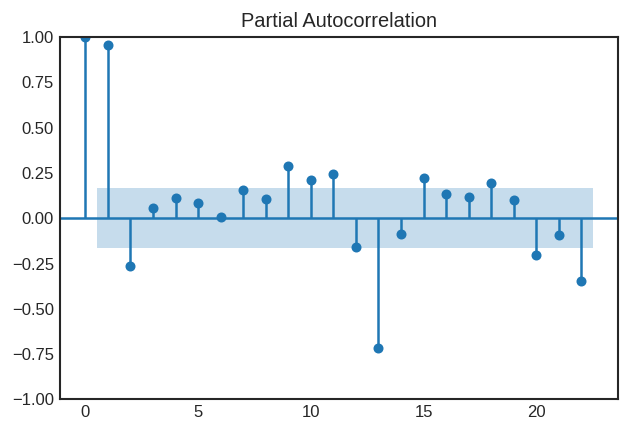

In [116]:
plot_pacf(series);

In [117]:
# fit model
uselags = [1]
model = AutoReg(series, lags=uselags)
model_fit = model.fit()

In [118]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Sun, 19 Dec 2021   AIC                           1414.212
Time:                        20:08:38   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7055      7.084      1.935      0.053      -0.178      27.589
#Passengers.L1     0.9589      0.023     41.106      0.000       0.913       1.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0428           +0.0000j            1.0428            0.0000
-----------------------------------------------------------------------------
"""

In [122]:
series.shape

(144,)

In [119]:
model_fit.predict(len(series), len(series))

1961-01-01    427.964119
Freq: MS, dtype: float64

### from linear regression

In [87]:
seriesb = pd.DataFrame(series.copy())

In [88]:
seriesb.columns = ['t_original']

In [93]:
def diffdf(df:"pd.DataFrame",
           var:str,
           interval:int = 1, 
           plot:bool = False) -> "pd.DataFrame":
    # internal func
    series = df[var]

    diff = list()
    for i in range(interval, len(series)):
        value = series[i] - series[i - interval]
        diff.append(value)

    diff = pd.Series(diff)

    # new dataframe with only relevant rows to plot
    newdf = df[interval:]

    # final dataframea
    newdf[f'diff_{interval}'] = diff.values

    newdf
    
    if plot:
        plt.plot(newdf[var], color = 'blue', label = 'original');
        plt.plot(newdf[f'diff_{interval}'], color = 'green', label = f'diff_{interval}');
        plt.legend();
        plt.show();

    return newdf

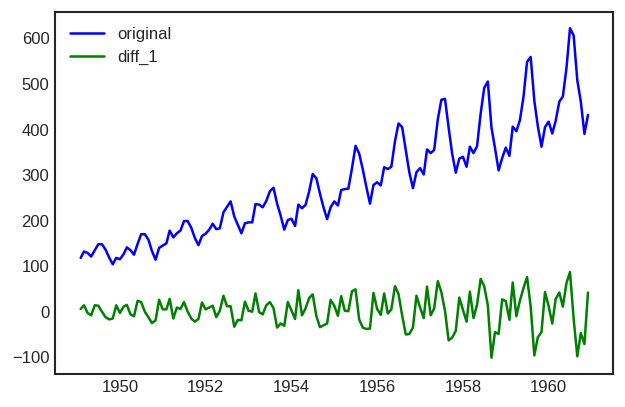

In [94]:
seriesc = diffdf(seriesb, var = "t_original", plot = True)

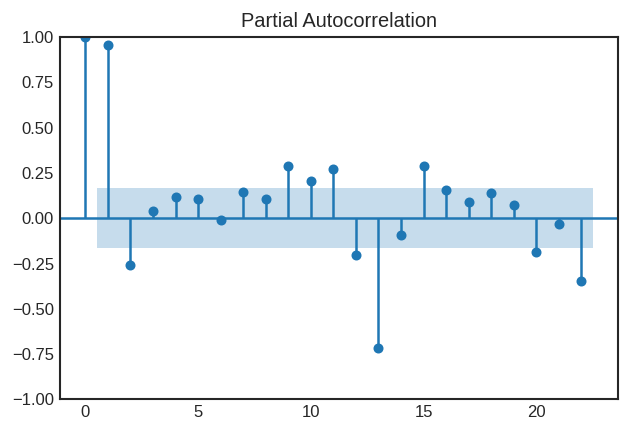

In [99]:
plot_pacf(seriesc['t_original']);

### creating the X 

In [100]:
seriesc['t_left1'] = seriesc['t_original'].shift(periods = 1)

### split

In [180]:
seriesc = seriesc.dropna()
X = seriesc['t_left1'].values
y = seriesc['t_original'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### train

In [181]:
X_train_addconst = sm.add_constant(X_train)
X_test_addconst = sm.add_constant(X_test)
lr = sm.OLS(endog = y_train, exog = X_train_addconst)
res = lr.fit()
res.params

array([16.41882155,  0.95595788])

In [182]:
y_hat = res.predict(X_test_addconst)
y_hat

array([459.02731918, 457.11540343, 130.17780906, 317.5455532 ,
       241.06892294, 180.84357661, 178.93166085, 341.44450016,
       155.03271389, 411.22942527, 308.94193229, 192.31507115,
       416.96517254, 167.46016631, 216.2140181 , 348.1362053 ,
       235.33317567, 180.84357661, 211.43422871, 159.81250329,
       611.02462183, 199.00677629, 360.56365772, 349.09216318,
       203.78656569, 467.63094009, 403.58176224, 186.57932388,
       337.62066864])

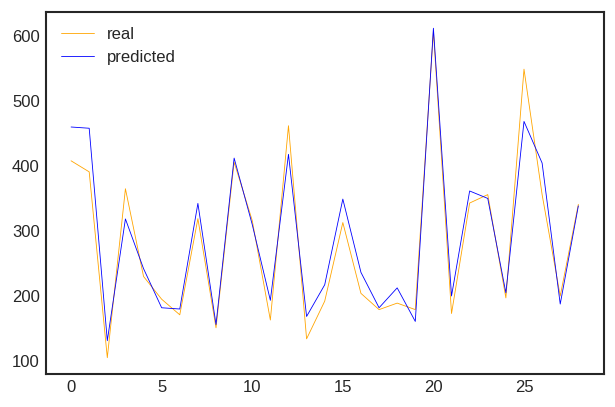

In [183]:
plt.plot(y_test, label = 'real', color = 'orange', linewidth = 0.5);
plt.plot(y_hat, label = 'predicted', color = 'blue', linewidth = 0.5);
plt.legend();
plt.show();

### summary

In [184]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1211.
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.50e-61
Time:                        20:28:33   Log-Likelihood:                -558.40
No. Observations:                 113   AIC:                             1121.
Df Residuals:                     111   BIC:                             1126.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.4188      8.304      1.977      0.051      -0.037      32.874
x1             0.9560      0.027     34.805      0.000       0.902       1.010
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                0.649
Skew:                          -0.058   Prob(JB):                        0.723
Kurtosis:                       3.353   Cond. No.                         781.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
tsdata = tsdata.dropna()
y = tsdata['value'].values
X = tsdata['values_left1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train_addconst = sm.add_constant(X_train, prepend = False)
X_test_addconst = sm.add_constant(X_test, prepend = False)
lr = sm.OLS(endog = y_train, exog = X_train_addconst)
res = lr.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 3.610e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:28:34   Log-Likelihood:                -11342.
No. Observations:                7999   AIC:                         2.269e+04
Df Residuals:                    7997   BIC:                         2.270e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9031      0.005    189.990      0.000       0.894       0.912
const          0.0607      0.012      5.202      0.000       0.038       0.084
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.140
Skew:                          -0.010   Prob(JB):                        0.932
Kurtosis:                       2.998   Cond. No.                         2.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
out("all")
series[-1]
model_fit.predict(start = len(series), end = len(series))

432

1961-01-01    427.964119
Freq: MS, dtype: float64

## From Scratch

- https://www.youtube.com/watch?v=4O9Rkzm8Q5U

In [187]:
tsdata = pd.read_csv('data/ts_data.csv')
tsdata = tsdata.drop('Time',axis = 1)
tsdata.columns = tsdata.columns.str.lower()
tsdata.sample(5)

,value
9690,1.716888
6926,-0.491407
1063,0.447560
9751,2.502107
9805,0.549948


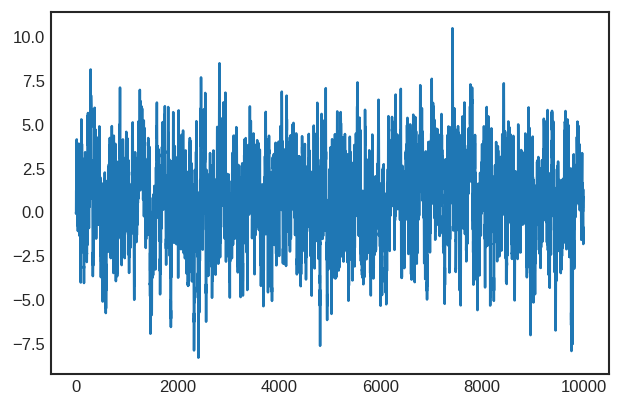

In [188]:
plt.plot(tsdata)

## Test stationary
- To apply autocorrelation, time series must be stationary, that is:
    - mean : cte
    - standard deviation : cte
    - do not shows seasonality

In [189]:
from statsmodels.tsa.stattools import adfuller

In [190]:
result = adfuller(tsdata.values)
print('ADF Statistic : %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - Time Series is Stationary")
else:
    print('Failed to Reject Ho - Time Series is Non-Stationary')

ADF Statistic : -22.184930
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


### Determining the AR order

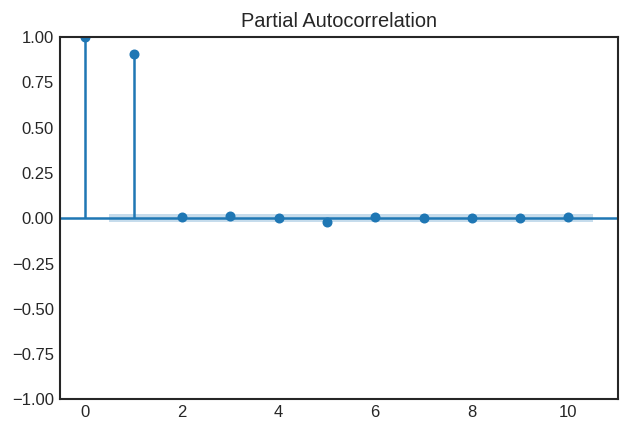

In [191]:
plot_pacf(tsdata, lags = 10);

In [192]:
tsdata['values_left1'] = tsdata['value'].shift(periods = 1)

In [193]:
tsdata

,value,values_left1
0,0.000000,NaN
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
...,...,...
9995,1.302256,0.873224
9996,0.558165,1.302256
9997,-1.401546,0.558165
9998,-1.817701,-1.401546


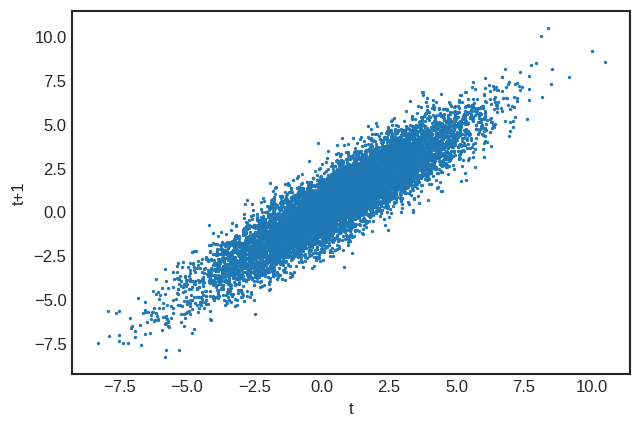

In [194]:
plt.scatter(x = tsdata['values_left1'], y = tsdata['value'], s = 1);
plt.xlabel('t');
plt.ylabel('t+1');

### linear regression steps

In [195]:
tsdata = tsdata.dropna()
y = tsdata['value'].values
X = tsdata['values_left1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [196]:
X_train_addconst = sm.add_constant(X_train, prepend = False)
X_test_addconst = sm.add_constant(X_test, prepend = False)
lr = sm.OLS(endog = y_train, exog = X_train_addconst)
res = lr.fit()

In [197]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 3.709e+04
Date:                Sun, 19 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:28:36   Log-Likelihood:                -11242.
No. Observations:                7999   AIC:                         2.249e+04
Df Residuals:                    7997   BIC:                         2.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9056      0.005    192.579      0.000       0.896       0.915
const          0.0681      0.012      5.914      0.000       0.046       0.091
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.015
Skew:                           0.003   Prob(JB):                        0.992
Kurtosis:                       3.001   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Predictions

In [198]:
y_hat = res.predict(X_test_addconst)
y_hat

array([ 0.26371018,  0.12798722,  1.12876257, ...,  1.67921788,
        1.08125032, -3.18752869])

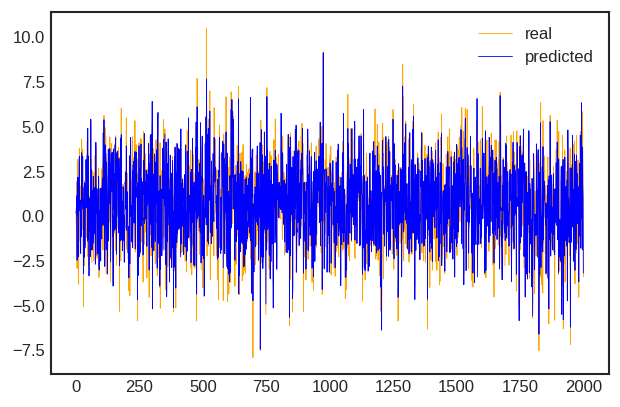

In [199]:
plt.plot(y_test, label = 'real', color = 'orange', linewidth = 0.5);
plt.plot(y_hat, label = 'predicted', color = 'blue', linewidth = 0.5);
plt.legend();
plt.show();

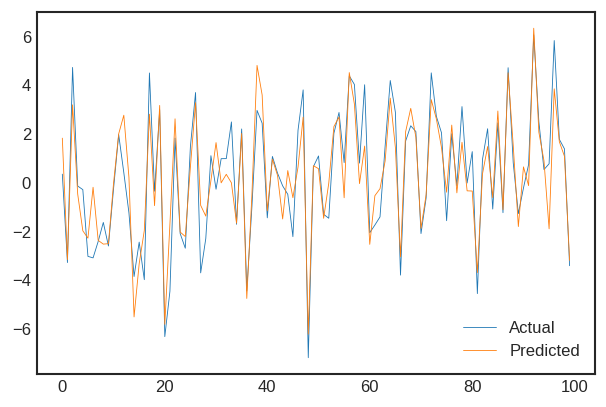

In [201]:
_last = 100
plt.plot(y_test[-_last:], label = 'Actual',linewidth = 0.5);
plt.plot(y_hat[-_last:], label = 'Predicted', linewidth = 0.5);
plt.legend();
plt.show();